In [1]:

from JC_functions import *
from JC_momenst import *

import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

leaves = np.load(r"D:\_WPI\geom_learn\Shared_Files\python_\Geometric-Learning\etape6.npy")

In [2]:
N, d, c = leaves.shape
labels = np.repeat(np.arange(15), 50)

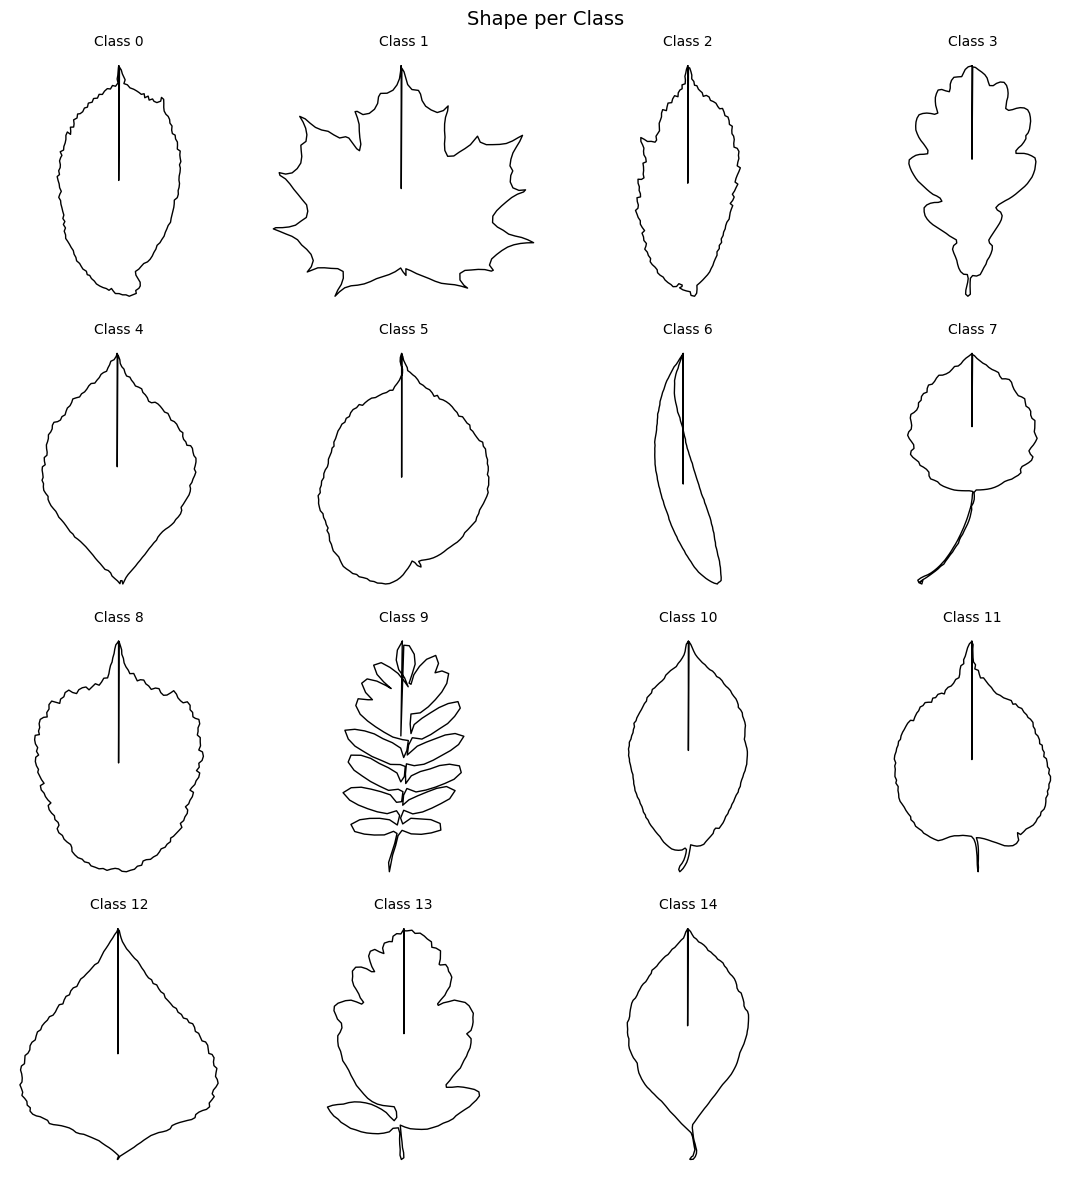

In [3]:
complex_leaves = np.array([Normalize(shape_to_complex(reparametrize_by_arc_length(leaves[i], 200, False)[1][:-1])) for i in range(N)])




shape_per_class = one_polygon_per_class(complex_leaves, labels)

classes = sorted(shape_per_class.keys())
n_classes = len(classes)

# ---- Create grid dynamically ----
ncols = 4
nrows = int(np.ceil(n_classes / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))
axes = np.atleast_1d(axes).ravel()

# ---- Plot ----
for ax, lab in zip(axes, classes):
    plot_polygon(ax, shape_per_class[lab], color="black", lw=1)
    ax.set_title(f"Class {lab}", fontsize=10)

# ---- Remove unused axes ----
for ax in islice(axes, n_classes, None):
    ax.remove()

plt.suptitle("Shape per Class", fontsize=14)
plt.tight_layout()
plt.show()



In [4]:
feature_dicts = [features_13(remove_duplicate_vertices(leaf)) for leaf in complex_leaves]

feature_names = list(feature_dicts[0].keys())
X_real = np.array([
    [fd[name].real if np.iscomplexobj(fd[name]) else fd[name]
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X_imag = np.array([
    [fd[name].imag if np.iscomplexobj(fd[name]) else 0.0
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X = np.concatenate([X_real, X_imag], axis=1)

Dimension of ambient space: 22,
Estimated global dimension: 8,
The estimated dimensions per class are: [6 4 5 6 6 6 4 4 6 6 6 5 5 6 5], 
Upper bound local dimension = 6, 
Centroids positions = [[-0.27016367 -0.96361325]
 [ 0.8496977   2.47720148]
 [ 0.31970214 -0.9171685 ]
 [-0.80063069  2.57720912]
 [-0.65877817 -1.0962361 ]
 [-1.13720054 -1.27120104]
 [ 7.22236348 -0.34355541]
 [-1.79710873 -0.143616  ]
 [ 0.36390615 -1.01575707]
 [-2.13506013  2.28974492]
 [ 0.65741607 -1.3653201 ]
 [-1.09761208 -1.07257841]
 [ 0.31319152 -2.31356486]
 [-2.26508878  1.82629089]
 [-0.62110377 -1.09347449]]


C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


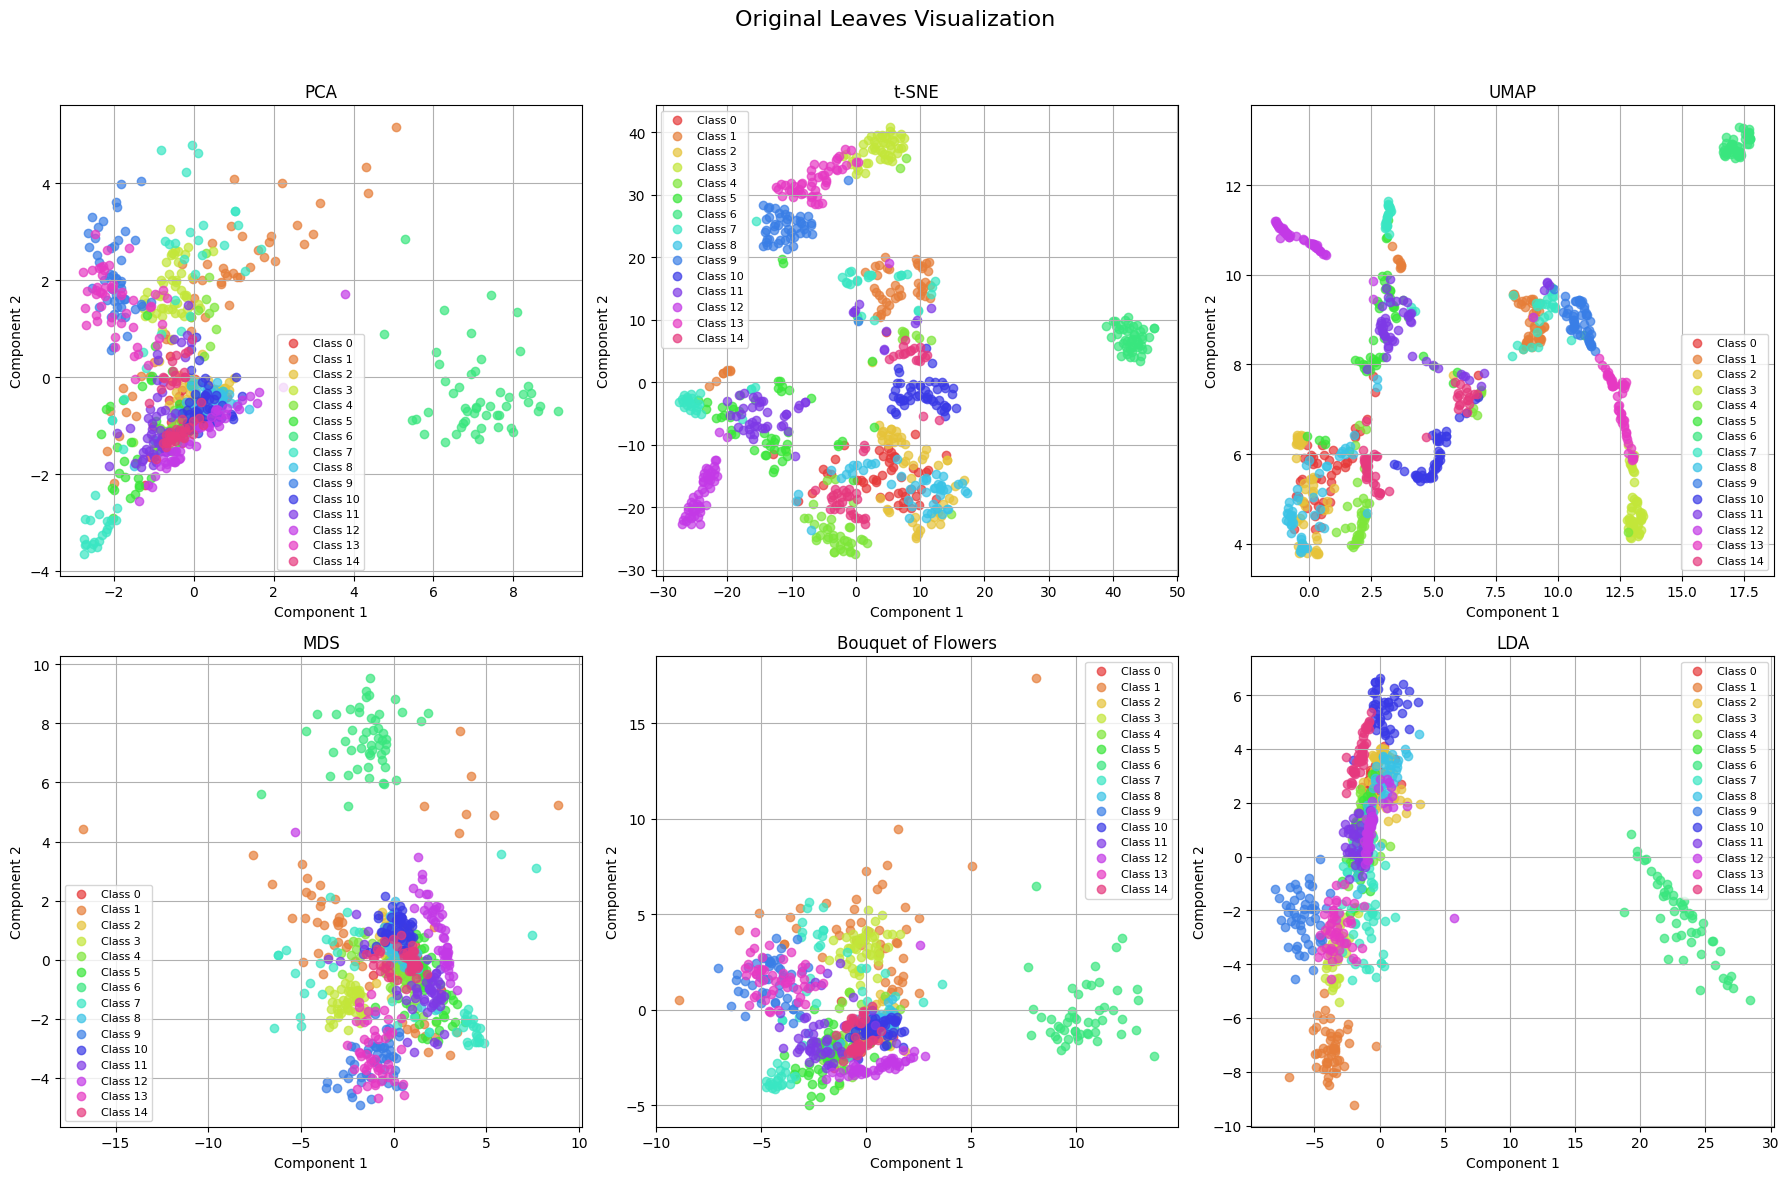

In [5]:
labels = np.asarray(labels).astype(int)
plot_2D(X, labels)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, labels,
    test_size=0.25,
    random_state=42,
    stratify=labels
)



rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)



y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Test accuracy: 0.8777

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       1.00      1.00      1.00        13
           2       0.79      0.92      0.85        12
           3       0.86      0.92      0.89        13
           4       0.92      0.85      0.88        13
           5       0.79      0.92      0.85        12
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        13
           8       0.78      0.58      0.67        12
           9       1.00      1.00      1.00        12
          10       0.71      0.92      0.80        13
          11       1.00      0.83      0.91        12
          12       1.00      1.00      1.00        13
          13       0.92      0.92      0.92        12
          14       0.82      0.69      0.75        13

    accuracy                           0.88       188
   macro avg       0.88      0.88 